In [25]:

library(data.table)
library(ggplot2)
library(reshape2)
library(pheatmap)



In [26]:
save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

In [35]:
##ORIGINAL VISUALIZATION
#dir='/ye/yelabstore3/10x.lupus/eqtls/sle.10pcs.subtracted/all/'
dir='/wynton/group/ye/ggordon/lupus/analyses/atac_enrichemnt/'
out='atac.enrichment.pdf'

#cts=c('Th', 'Tc', 'B', 'cM', 'ncM', 'NK', 'MK', 'cDC', 'PBMC')
#cts=c('pbmc', 'b', 'cdc', 'cm', 'ncm', 'nk', 'pdc', 'progen', 'prolif', 'tcyto', 'tem', 'tnaive', 'treg')
cts=c('pbmc', 'b', 'cdc', 'cm', 'ncm', 'nk', 'pdc', 'tcyto', 'tem', 'tnaive')
#cts=c('pbmc', 'b', 'cm', 'ncm', 'nk', 'pdc', 'tcyto', 'tem', 'tnaive')
#cts=c('pbmc_cg', 'b_cg', 'cdc_cg', 'cm_cg', 'ncm_cg', 'nk_cg', 'pb_cg', 'pdc_cg', 'progen_cg', 'prolif_cg', 't4_cg', 't8_cg')
#cts=c('pbmc_cg','b_cg', 'cdc_cg', 'cm_cg', 'ncm_cg', 'nk_cg',  't4_cg', 't8_cg')

cts=c('pbmc_cg', 'b_cg', 'cdc_cg', 'cm_cg', 'nk_cg', 'pb_cg', 'pdc_cg', 'progen_cg', 'prolif_cg', 't4_cg', 't8_cg')
cts=c('pbmc_cg', 'cdc_cg', 'cm_cg', 'nk_cg', 'pb_cg', 'pdc_cg', 'progen_cg', 'prolif_cg', 't4_cg', 't8_cg')

cts=c('pbmc_cg', 'b_cg', 'cdc_cg', 'cm_cg', 'ncm_cg', 'nk_cg','t4_cg', 't8_cg')
#cts=c('AverageTissue','b', 'cdc', 'cm', 'ncm', 'nk','t4', 't8','pdc')
#cts=c('AverageTissue','b', 'cdc', 'cm', 'ncm', 'nk','t4', 't8')

#cts=c('pbmc','b', 'cm', 'ncm', 'nk','t4', 't8','cdc','pdc')

#cts=c('pbmc_cg','b_cg', 'cm_cg', 'ncm_cg', 'nk_cg','t4_cg', 't8_cg','cdc_cg','pdc_cg')

#cts=c('AverageTissue', 'cm', 'ncm', 'nk','t4', 't8')

#cts=c('pbmc_cg',  'cdc_cg', 'cm_cg', 'ncm_cg', 'nk_cg','t4_cg', 't8_cg')


#cts=c('pbmc_cg', 'b_cg', 'cdc_cg', 'cm_cg', 'ncm_cg', 'nk_cg', 'pb_cg', 'pdc_cg', 'progen_cg', 't4_cg', 't8_cg')
#t8_cg.atac.MW.enrichment.genewise.1e5.txt 

all.df=NULL
for(c in cts){
    #res=fread(file=paste(dir, c, '.atac.MW.enrichment.txt', sep=''))
    #res=fread(file=paste(dir, 'filtered.', c, '.atac.MW.enrichment.txt', sep=''))
    #res=fread(file=paste(dir, c, '.atac.MW.enrichment.txt', sep=''))
    #res=fread(file=paste(dir, c, '.atac.MW.enrichment.genewise.1e6.txt', sep=''))
    #res=fread(file=paste(dir, c, '.atac.MW.enrichment.1e5_open.txt', sep=''))
    #res=fread(file=paste(dir, c, '.atac.MW.enrichment.1e5_expr.txt', sep=''))
    #res=fread(file=paste(dir, c, '.atac.MW.enrichment.1e5_expr_simple.txt', sep=''))
    #res=fread(file=paste(dir, c, '.atac.MW.enrichment.1e5_meta_sub.txt', sep=''))
    #res=fread(file=paste(dir, c, '.atac.MW.enrichment.1e5_meta_simple2.txt', sep=''))
    #res=fread(file=paste(dir, c, '.atac.MW.enrichment.fastgxe.txt', sep=''))
    #res=fread(file=paste(dir, c, '.atac.MW.enrichment.fastgxe_average.txt', sep=''))
    #res=fread(file=paste(dir, c, '.atac.MW.enrichment.fastgxe_mainNA_1.txt', sep=''))
    #res=fread(file=paste(dir, c, '.atac.MW.enrichment.fastgxeALL_1.txt', sep=''))
    #final het below
    #res=fread(file=paste(dir, c, '.atac.MW.enrichment.fastgxe_meta_het.txt', sep=''))
    res=fread(file=paste(dir, c, '.atac.MW.enrichment.meta_average.txt', sep=''))
    
    #res=fread(file=paste(dir, c, '.atac.MW.enrichment.fastgxe_meta_1e6.txt', sep=''))
    #res=fread(file=paste(dir, c, '.atac.MW.enrichment.fastgxe_meta_het_1e6.txt', sep=''))
    #res=fread(file=paste(dir, c, '.atac.MW.enrichment.fastgxe_meta_het_nopdc_1e6.txt', sep=''))
    #res=fread(file=paste(dir, c, '.atac.MW.enrichment.fastgxe_meta_het_nopdc_1e5.txt', sep=''))
    
    
    
    all.df=rbind(all.df, data.frame(res, ct=c))
    
}



#all.df$pval_sig='.'
#all.df$pval_sig[all.df$pval < 0.00001]='*'
#all.df$pval_sig[all.df$pval < 0.0000001]='**'
#all.df$pval_sig[all.df$pval < 0.0000000001]='***'

all.df$pval_sig='.'
#all.df$pval_sig[all.df$pval < 0.1]='*'
all.df$pval_sig[all.df$pval < 0.01]='*'
all.df$pval_sig[all.df$pval < 0.001]='**'
all.df$pval_sig[all.df$pval < 0.0001]='***'


all.df.use=all.df[all.df$ct!='MK', ]
all.df.use$pair=paste(all.df.use$group, all.df.use$ct)
print(head(all.df.use))

all.df.use$logp=-log10(all.df.use$pval)

#mat=dcast(all.df.use, group ~ ct, value.var = 'OR')

#mat=dcast(all.df.use, group ~ ct, value.var = 'logp')
mat=dcast(all.df.use, group ~ ct, value.var = 'W')
rownames(mat)=mat$group

# #normalize by row
mat=mat[, -1]
col_names=colnames(mat)
row_names=rownames(mat)
print(mat)
mat_new=(mat)

mat_new=mat[-which(rownames(mat) %in% c('EPI', 'progenitor','thymocyte')), ]
#mat_new=mat[-which(rownames(mat) %in% c('EPI_resting', 'progenitor_resting','thymo_resting')), ]
col_names=colnames(mat_new)
row_names=rownames(mat_new)
#mat_new=mat[-which(rownames(mat) %in% c('EPI_resting', 'progenitor_resting',"open")), ]
#mat_new=mat[-which(rownames(mat) %in% c("open")), ]
print("new")
print(mat_new)
##below is the correct scale, scales on peaks
mat_newt <- t(apply(mat_new, 1, function(x){scale(x)}))
#mat_new <- t(apply(mat_new, 1, function(x){(x)}))
#try a secondary scale to scale on eqtls
mat_new <- t(apply(mat_newt, 2, function(x){scale(x)}))
#mat_new <- (apply(mat_new, 2, function(x){scale(x)}))


print('pre col')
print(mat_new)
##for the original
#colnames(mat_new)=col_names
#rownames(mat_new)=row_names

#for the double
colnames(mat_new)=row_names
rownames(mat_new)=col_names
mat_new=t(mat_new)

print('new names')
print(mat_new)
df.use=melt(mat_new)
print(df.use)
df.use$pair=paste(df.use$Var1, df.use$Var2)
df.use$pval_sig=all.df.use$pval_sig[match(df.use$pair, all.df.use$pair)]


print(head(df.use))

# print(unique(df.use$Var1))
# print(unique(df.use$Var2))

# #  [1] B_resting          B_stimulated       B&T_stimulated     EPI_resting       
# #  [5] myeloid_resting    nk_resting         open               progenitor_resting
# #  [9] T_resting          T_stimulated       thymo_resting    


#order_var1=c('B_resting', 'B_stimulated', 'B&T_stimulated', 'T_resting', 'T_stimulated', 'thymo_resting', 'nk_resting', 'EPI_resting', 'progenitor_resting',  'myeloid_resting', 'open')
#order_var1=c('B_resting', 'B_stimulated', 'B&T_stimulated', 'T_resting', 'T_stimulated',  'nk_resting','thymo_resting', 'myeloid_resting', 'open')
#order_var1=c('B_resting', 'B_stimulated', 'B&T_stimulated', 'T_resting', 'T_stimulated',  'nk_resting', 'thymo_resting', 'myeloid_resting', 'open')
#order_var1=c('B_resting', 'B_stimulated', 'B&T_stimulated','thymo_resting',  'T_resting', 'T_stimulated', 'nk_resting', 'EPI_resting', 'progenitor_resting', 'myeloid_resting',  'open')
#order_var1=c('B', 'T', 'thymo_resting', 'nk_resting', 'EPI_resting', 'progenitor_resting', 'myeloid_resting',  'open')
#order_var1=c('B', 'T', 'thymo_resting', 'nk_resting','myeloid_resting',  'open')
order_var1=c('B', 'T', 'thymocyte', 'nk','myeloid',  'open')
#order_var1=c('B', 'T', 'thymo_resting', 'nk_resting','myeloid_resting',  'open')

#order_var2=c('B', 'Th', 'Tc', 'NK', 'cM', 'ncM', 'cDC', 'PBMC', 'ct.combined')
#order_var2=c('b', 'tcyto', 'tem', 'tnaive', 'nk', 'cm', 'ncm', 'cdc', 'pdc','progen','prolif','pbmc', 'ct.combined')

#order_var2=c('b_cg', 'tcyto', 'tem', 'tnaive', 'nk', 'cm', 'ncm', 'cdc', 'pdc','progen','prolif','pbmc', 'ct.combined')
#order_var2=c( 'b_cg','pb_cg', 't4_cg', 't8_cg', 'nk_cg','cm_cg', 'ncm_cg','cdc_cg',  'pdc_cg', 'progen_cg','pbmc_cg', 'ct.combined')
order_var2=c( 'b_cg','pb_cg', 't4_cg', 't8_cg', 'nk_cg', 'prolif_cg','progen_cg','cm_cg', 'ncm_cg','pdc_cg','cdc_cg','pbmc_cg', 'ct.combined')
#order_var2=c( 'b','pb', 't4', 't8', 'nk', 'prolif','progen','cm', 'ncm','pdc','cdc','pbmc', 'AverageTissue','ct.combined')
#order_var2=c( 'b','pb', 't4', 't8', 'nk', 'prolif','progen','cm', 'ncm','pdc','cdc','pbmc', 'ct.combined')

#order_var2=c( 'b_cg', 't4_cg', 't8_cg', 'nk_cg', 'cm_cg', 'ncm_cg','cdc_cg','pbmc_cg', 'ct.combined')


#order_var2=c( 'b_cg','pb_cg', 't4_cg', 't8_cg', 'nk_cg','cm_cg', 'cdc_cg',  'pdc_cg', 'progen_cg', 'prolif_cg','pbmc_cg', 'ct.combined')

#order_var2=c('b', 'tcyto', 'tem', 'tnaive', 'nk', 'cm', 'ncm', 'pdc','pbmc', 'ct.combined')
##FOR ORIGNAL
#df.use$Var1=factor(df.use$Var1, levels=order_var1)
#df.use$Var2=factor(df.use$Var2, levels=order_var2)

#for double
df.use$Var1=factor(df.use$Var1, levels=order_var1)
df.use$Var2=factor(df.use$Var2, levels=order_var2)
#df.use=df.use[-which(df.use$Var1 %in% c('EPI_resting', 'progenitor_resting')), ]

            W      pval      group      ct pval_sig               pair
1  8306822806 0.8611540          B pbmc_cg        .          B pbmc_cg
2 11822233596 0.3462795        EPI pbmc_cg        .        EPI pbmc_cg
3  6911242886 0.7972833    myeloid pbmc_cg        .    myeloid pbmc_cg
4  4853769838 0.4172019         nk pbmc_cg        .         nk pbmc_cg
5 49740920693 0.7550059       open pbmc_cg        .       open pbmc_cg
6 23253492748 0.9673799 progenitor pbmc_cg        . progenitor pbmc_cg
                  b_cg      cdc_cg       cm_cg      ncm_cg       nk_cg
B           8458523758  8462994033  8455599460  8404967714  8397228202
EPI        11722544078 11835208904 11726260208 11814325096 11821667358
myeloid     6952964931  7060034559  7145564550  7055042315  6959957081
nk          4921580682  4922073660  4862821200  4886040852  5106324362
open       50481737360 50473109020 50253588356 50214760018 50185952356
progenitor 23314860036 23501635837 23280526751 23376778782 23397406590
T     

In [36]:
df.use

Var1,Var2,value,pair,pval_sig
<fct>,<fct>,<dbl>,<chr>,<chr>
B,b_cg,0.91323650,B b_cg,.
myeloid,b_cg,-0.83522228,myeloid b_cg,.
nk,b_cg,-0.40153173,nk b_cg,.
open,b_cg,1.22355990,open b_cg,*
T,b_cg,-0.90004238,T b_cg,.
B,cdc_cg,0.64086041,B cdc_cg,.
myeloid,cdc_cg,0.54183844,myeloid cdc_cg,.
nk,cdc_cg,-0.36873129,nk cdc_cg,.
open,cdc_cg,0.78223333,open cdc_cg,.


In [39]:
mat=as.data.frame(dcast(df.use, Var1~Var2, fun.aggregate=mean))

rownames(mat)=as.character(mat$Var1)
mat=mat[-1]
col_order=c('pbmc_cg','cdc_cg','ncm_cg','cm_cg','nk_cg','t8_cg','t4_cg','b_cg')
mat=mat[col_order]

png 
  2

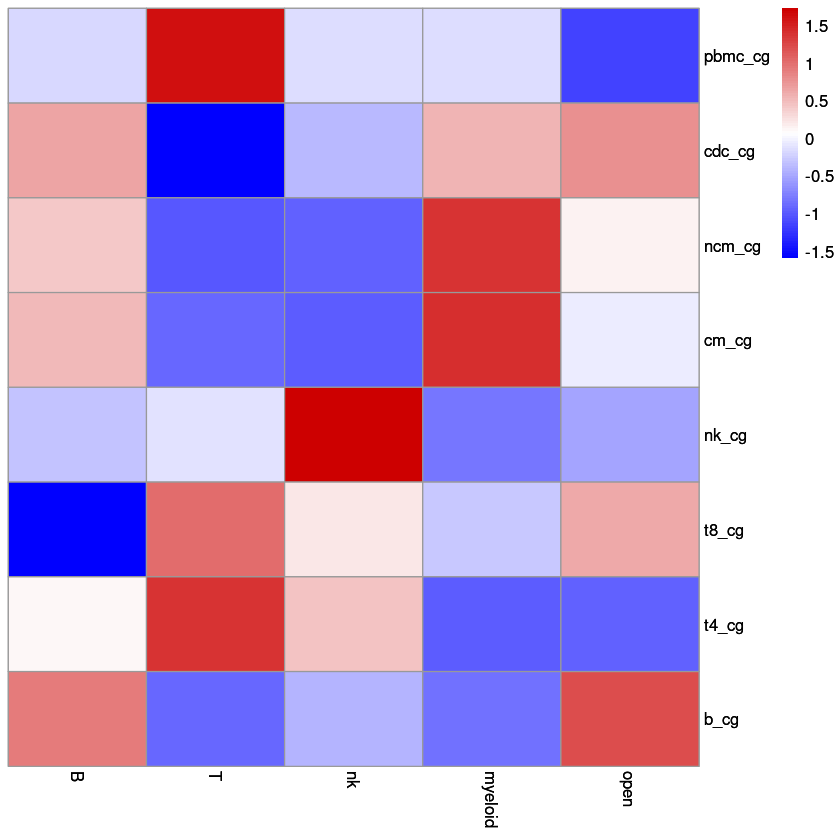

In [40]:
ph=pheatmap(t(mat), color = colorRampPalette(c('blue','white', 'red3'))(100), cluster_rows=F, cluster_cols = F,cex = 1)
print(ph)
save_pheatmap_pdf(ph,'/wynton/group/ye/ggordon/lupus/analyses/atac_enrichemnt/ph_atac_enrich_van_qtls.pdf')


png 
  2

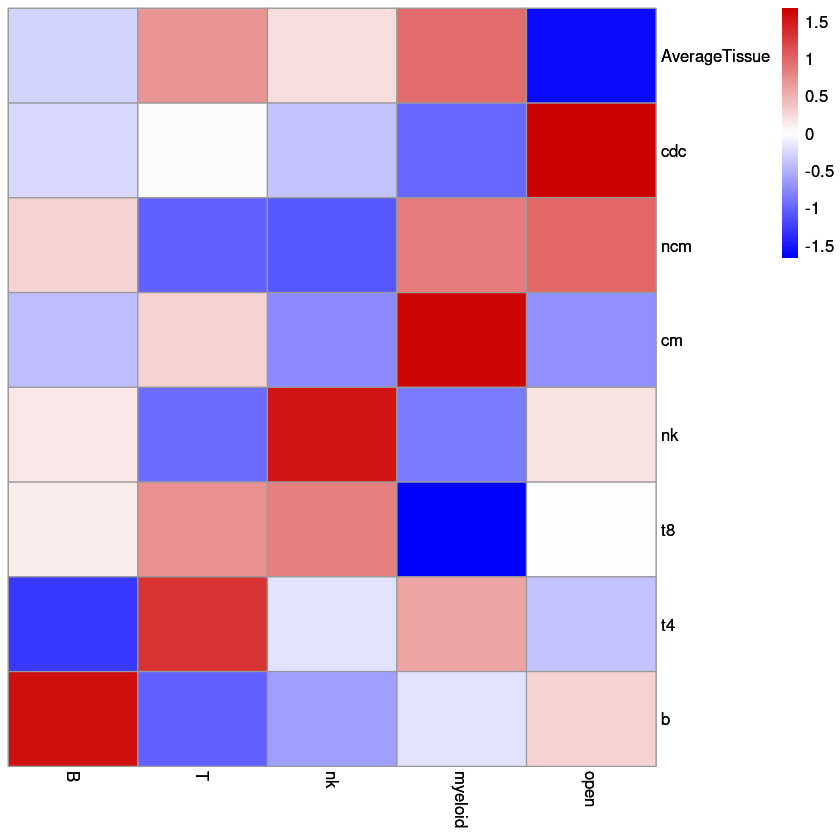

In [30]:
ph=pheatmap(t(mat), color = colorRampPalette(c('blue','white', 'red3'))(100), cluster_rows=F, cluster_cols = F,cex = 1)
print(ph)
save_pheatmap_pdf(ph,'/wynton/group/ye/ggordon/lupus/analyses/atac_enrichemnt/ph_atac_enrich_het_qtls.pdf')


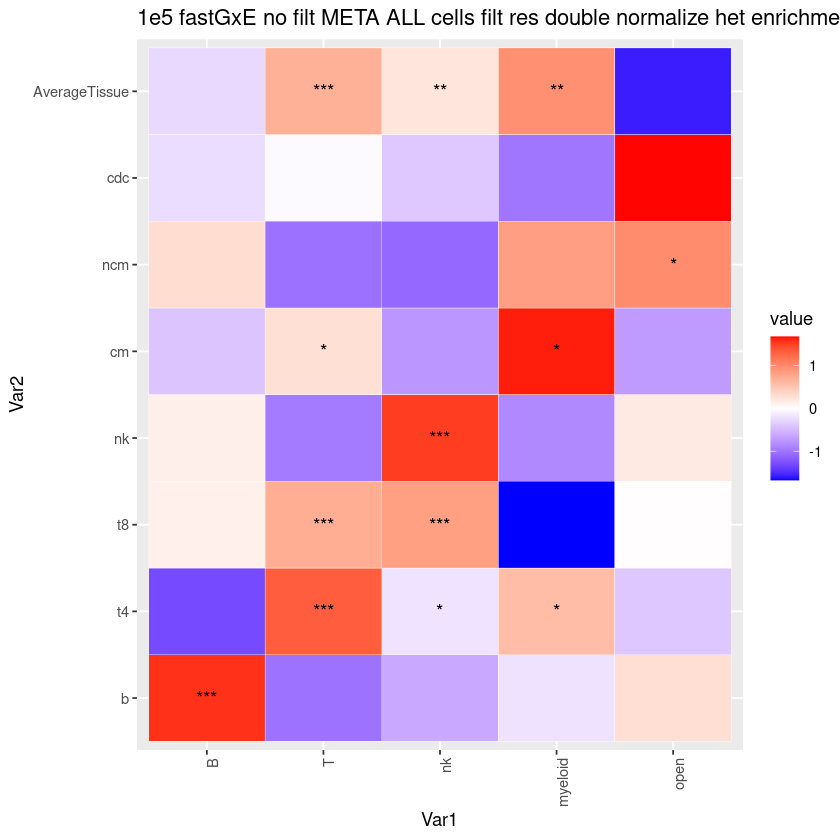

In [6]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 fastGxE no filt META ALL cells filt res double normalize het enrichment")
print(plt)

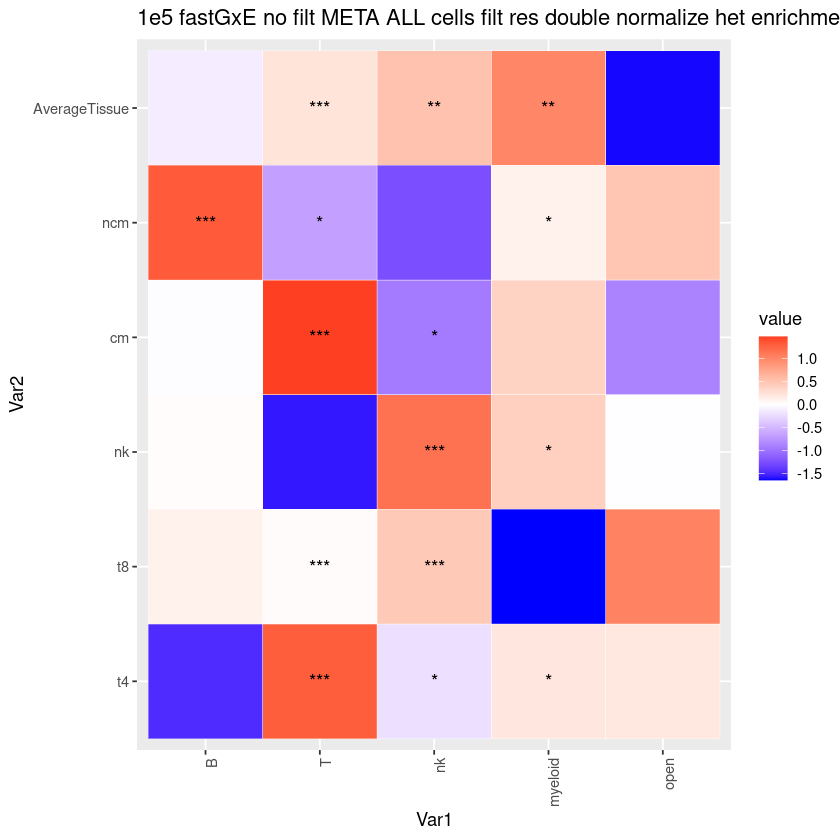

In [38]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 fastGxE no filt META ALL cells filt res double normalize het enrichment")
print(plt)

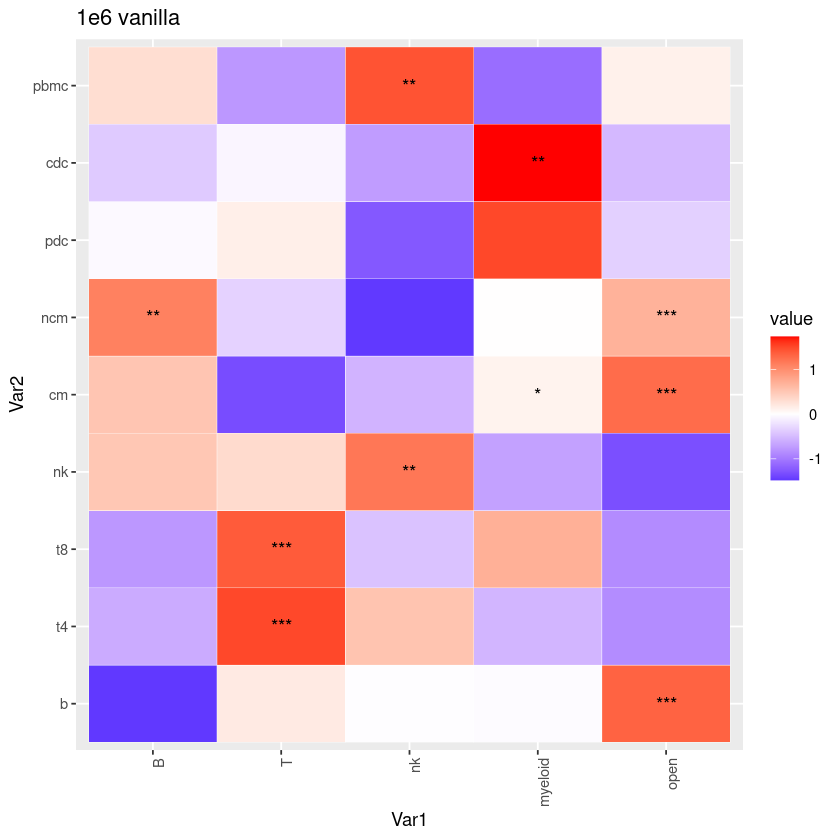

In [13]:
#1e6 van
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e6 vanilla")
print(plt)
ggsave(paste0('/wynton/group/ye/ggordon/lupus/analyses/atac_enrichemnt/atacEnrich_vanilla_meta_all_1e6.png'),dpi = 300,width=5, height=4)


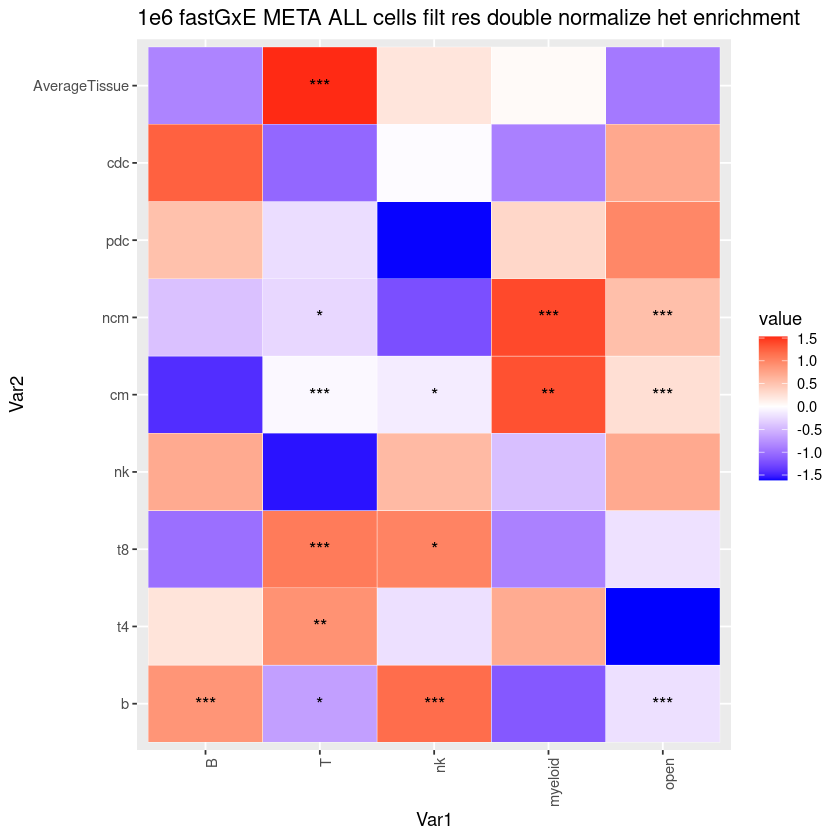

In [16]:
#1e6 fast
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e6 fastGxE META ALL cells filt res double normalize het enrichment")
print(plt)
ggsave(paste0('/wynton/group/ye/ggordon/lupus/analyses/atac_enrichemnt/atacEnrich_fastGxE_meta_all_1e6.png'),dpi = 300,width=5, height=4)


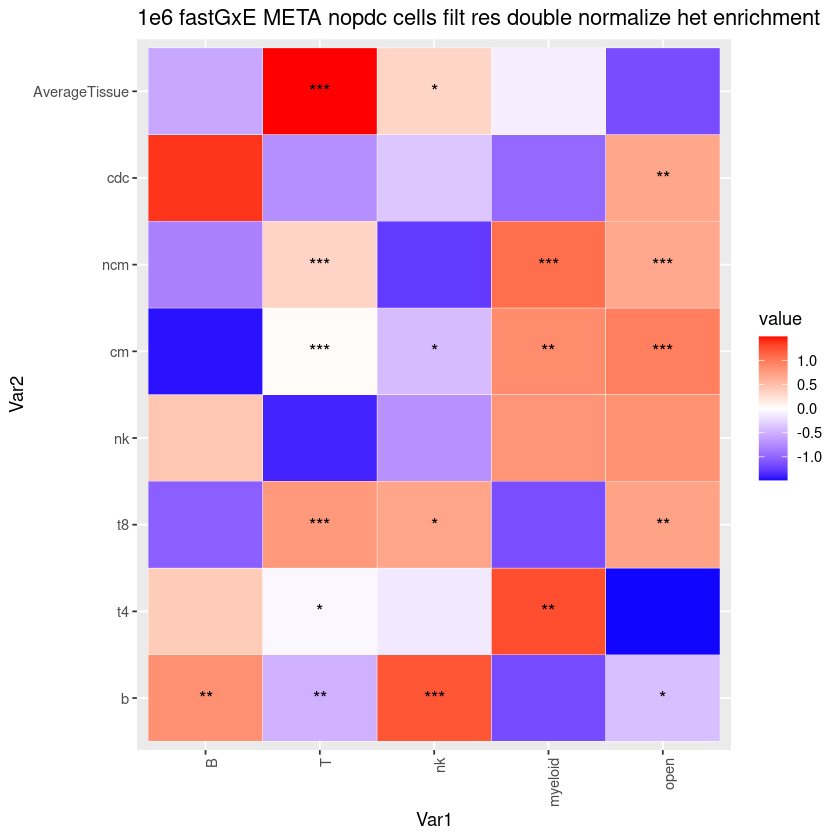

In [19]:
#1e6 fast nopdc
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e6 fastGxE META nopdc cells filt res double normalize het enrichment")
print(plt)
ggsave(paste0('/wynton/group/ye/ggordon/lupus/analyses/atac_enrichemnt/atacEnrich_fastGxE_meta_nopdc_1e6.png'),dpi = 300,width=5, height=4)


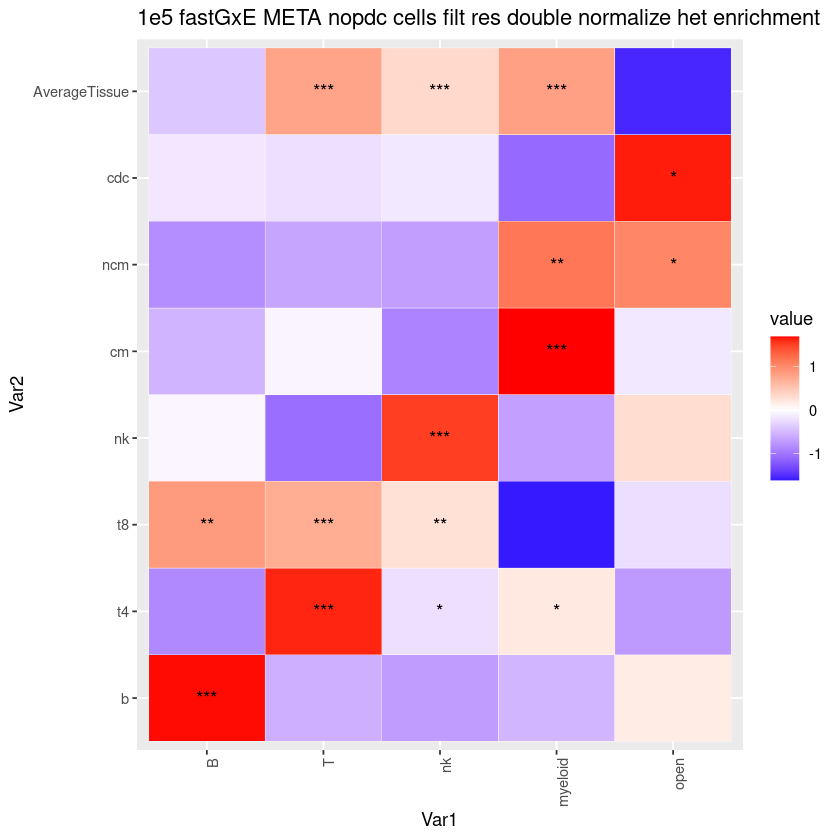

In [3]:
#1e5 fast nopdc
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 fastGxE META nopdc cells filt res double normalize het enrichment")
print(plt)
ggsave(paste0('/wynton/group/ye/ggordon/lupus/analyses/atac_enrichemnt/atacEnrich_fastGxE_meta_nopdc_1e5.png'),dpi = 300,width=5, height=4)


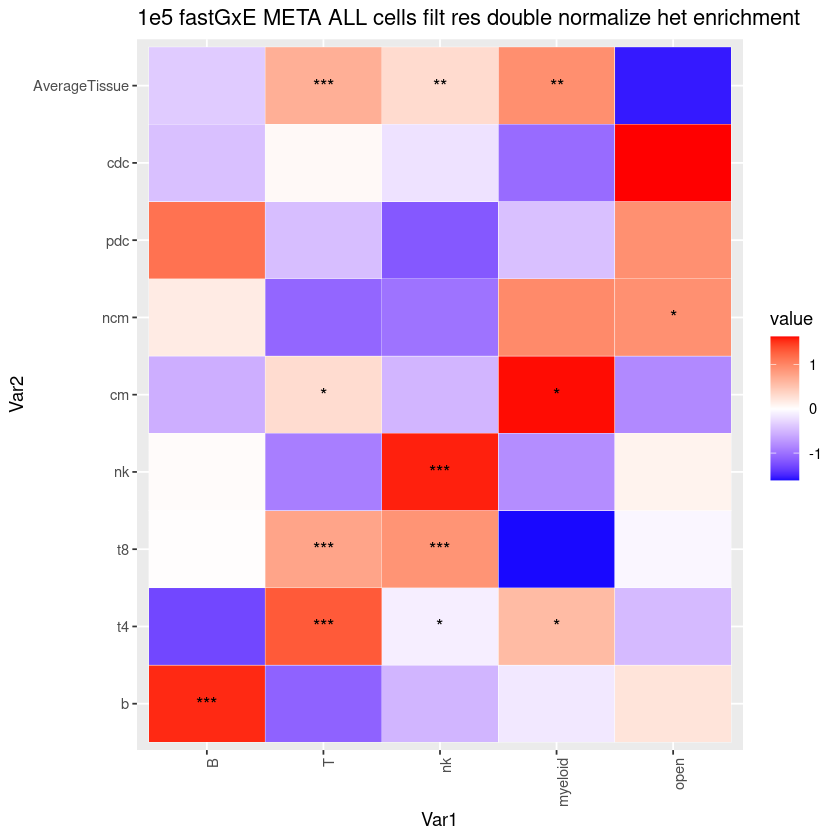

In [42]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 fastGxE META ALL cells filt res double normalize het enrichment")
print(plt)

ggsave(paste0('/wynton/group/ye/ggordon/lupus/analyses/atac_enrichemnt/atacEnrich_fastGxE_meta_all_1e5.png'),dpi = 300,width=5, height=4)


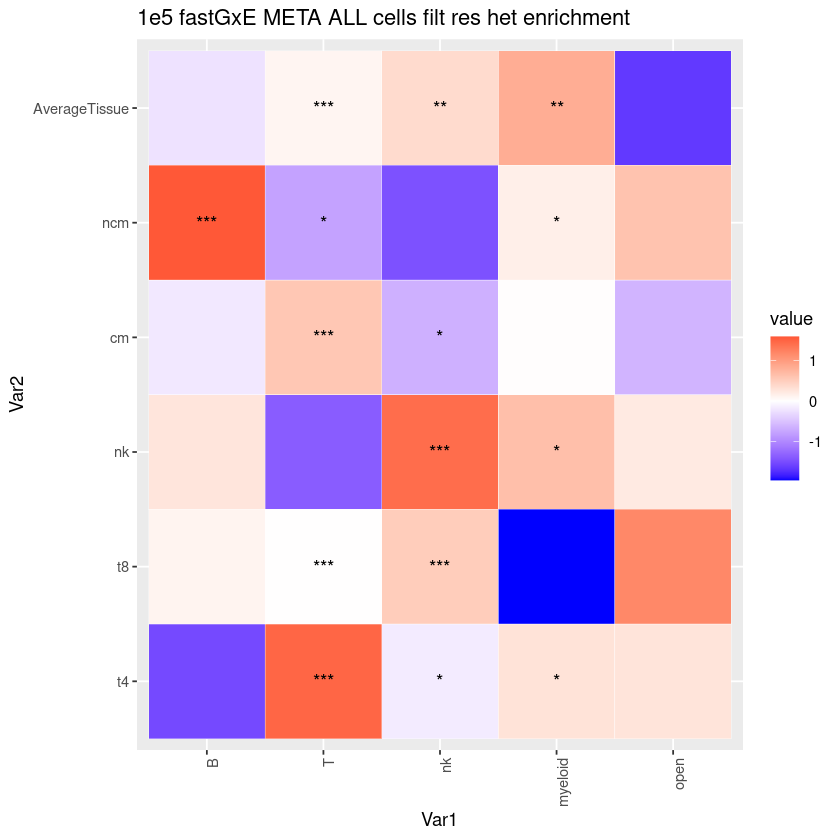

In [16]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 fastGxE META ALL cells filt res het enrichment")
print(plt)


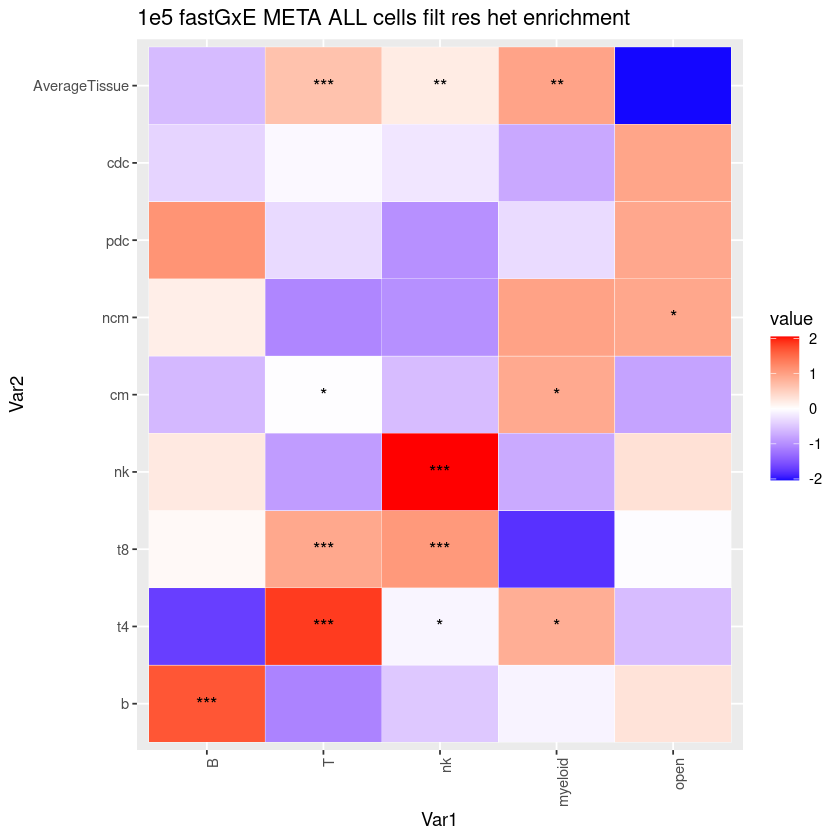

In [19]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 fastGxE META ALL cells filt res het enrichment")
print(plt)

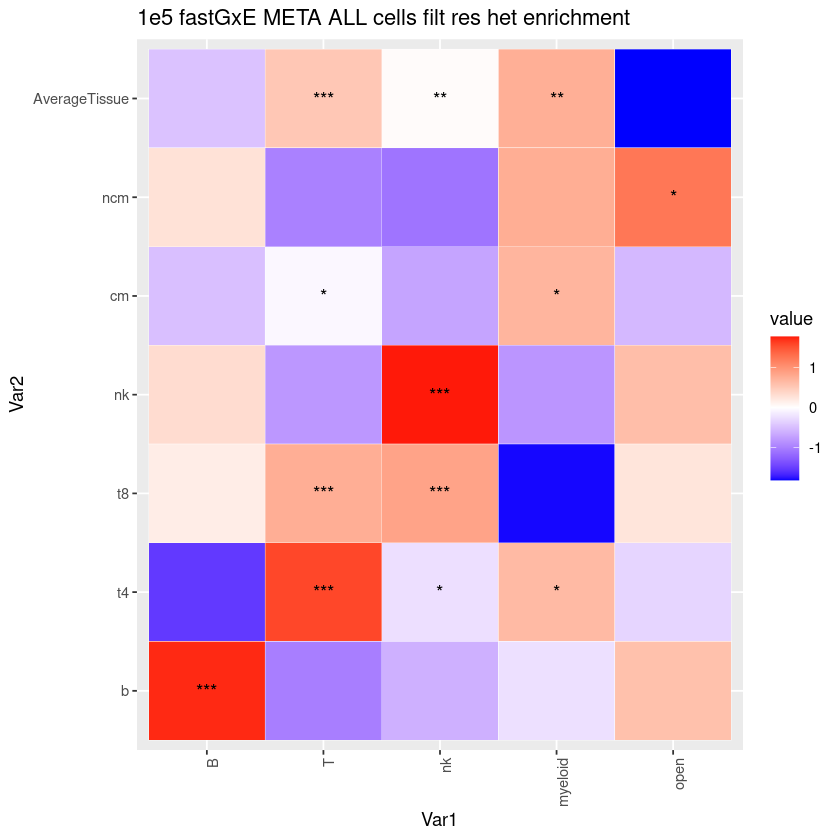

In [12]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 fastGxE META ALL cells filt res het enrichment")
print(plt)

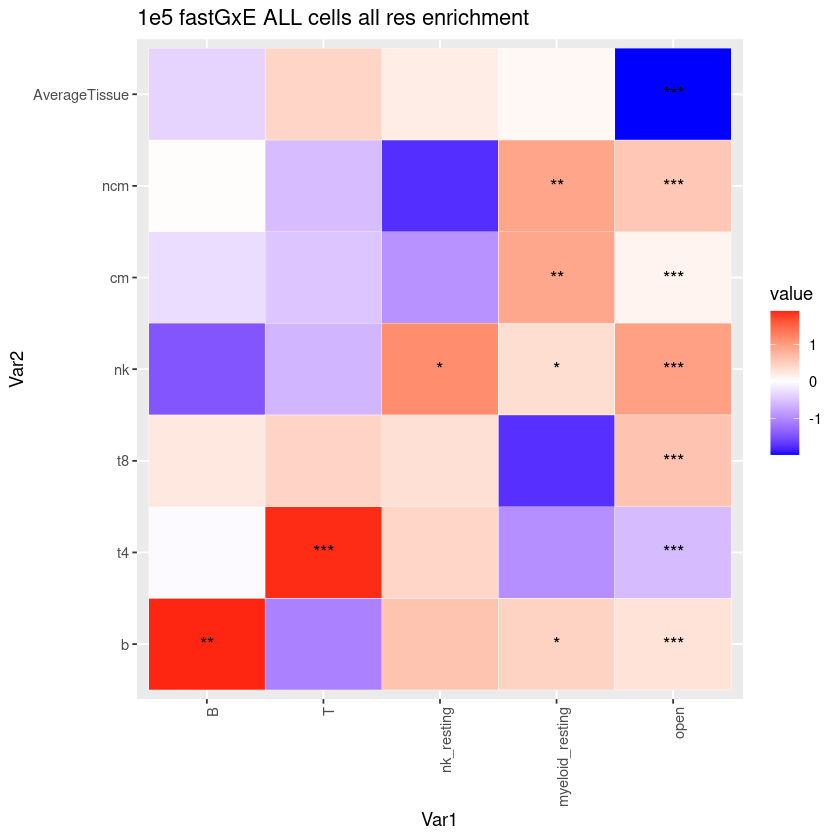

In [4]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 fastGxE ALL cells all res enrichment")
print(plt)

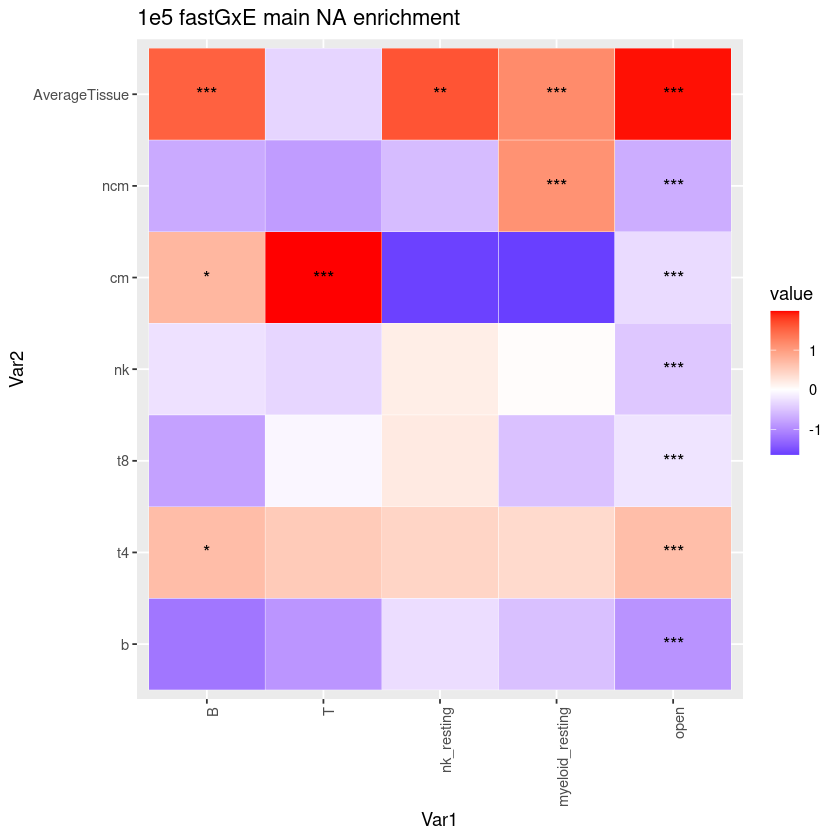

In [5]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 fastGxE main NA enrichment")
print(plt)

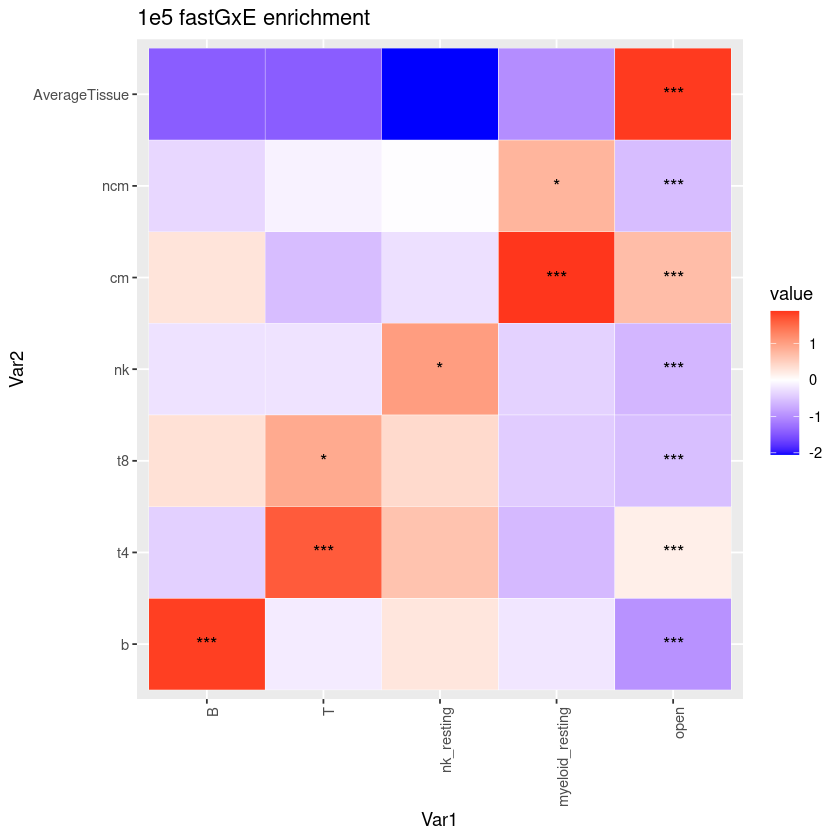

In [9]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 fastGxE enrichment")
print(plt)

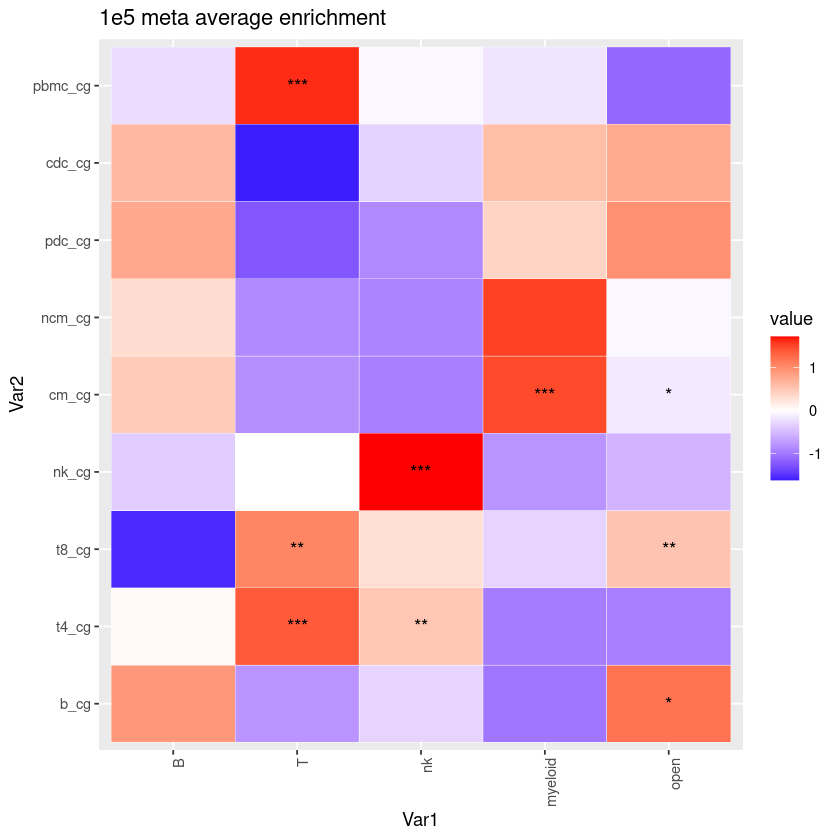

In [10]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 meta average enrichment")
print(plt)


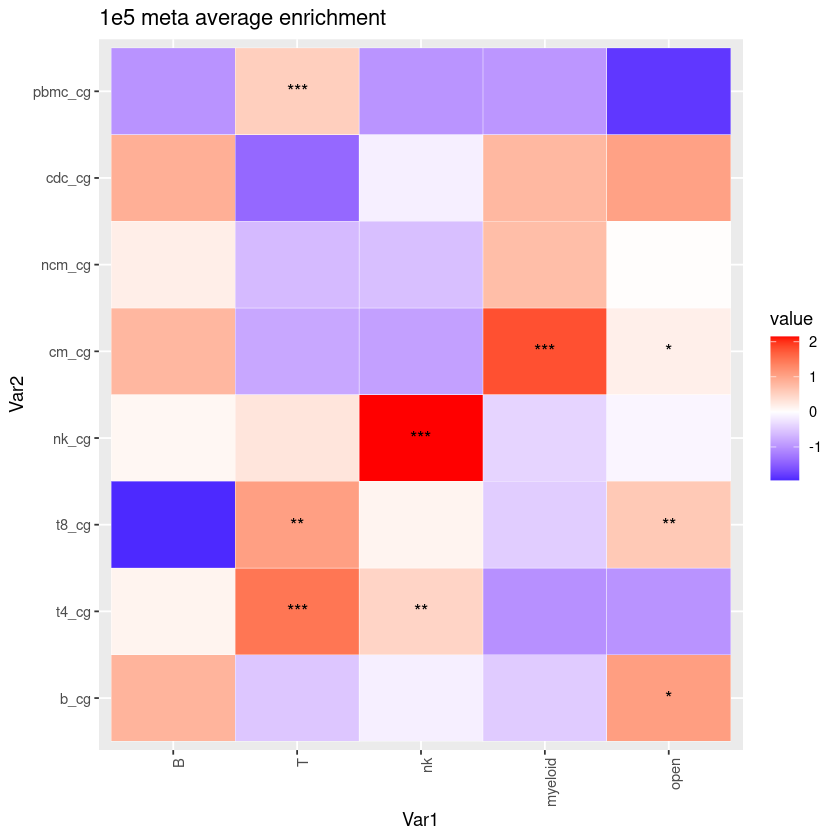

In [4]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 meta average enrichment")
print(plt)

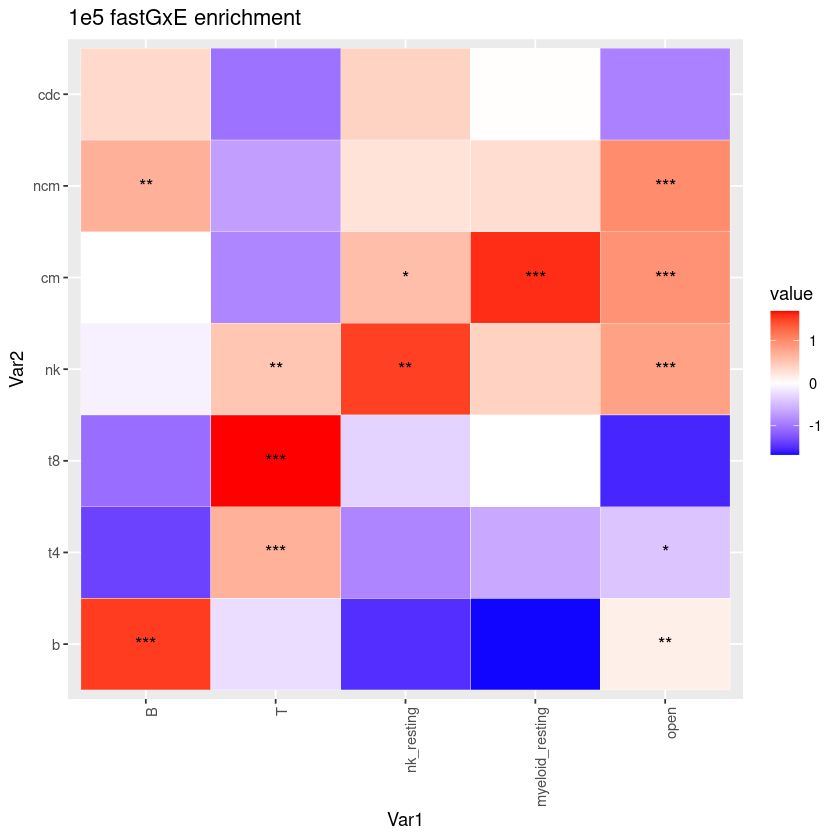

In [8]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 fastGxE enrichment")
print(plt)

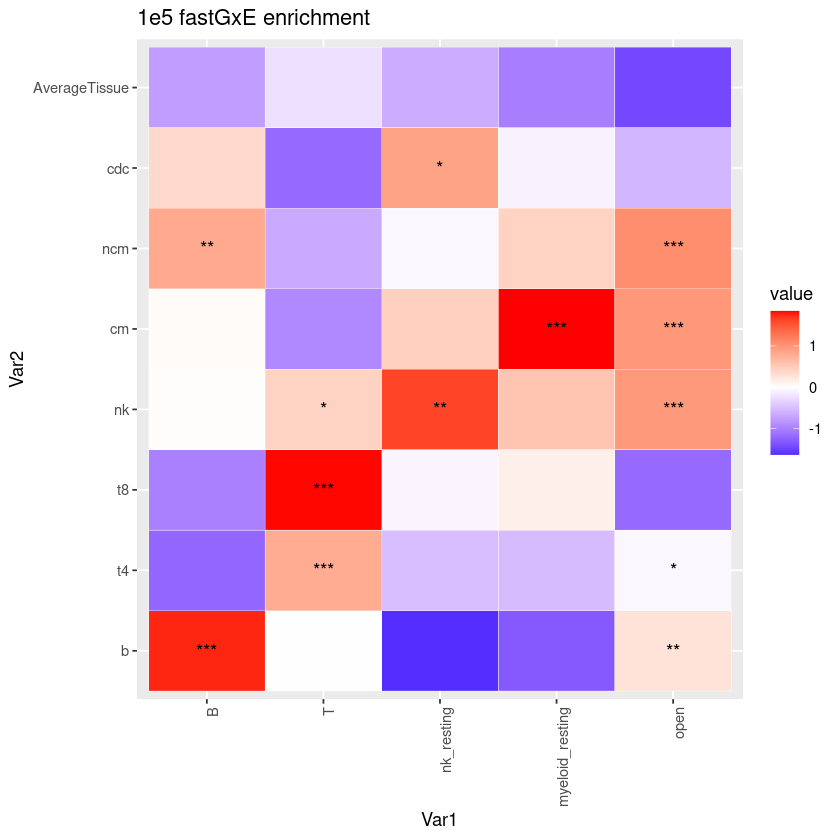

In [4]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 fastGxE enrichment")
print(plt)
ggsave(paste0('/wynton/group/ye/ggordon/lupus/analyses/atac_enrichemnt/atacEnrich_fastGxE_euro_1e5.png'),dpi = 300,width=4, height=4)


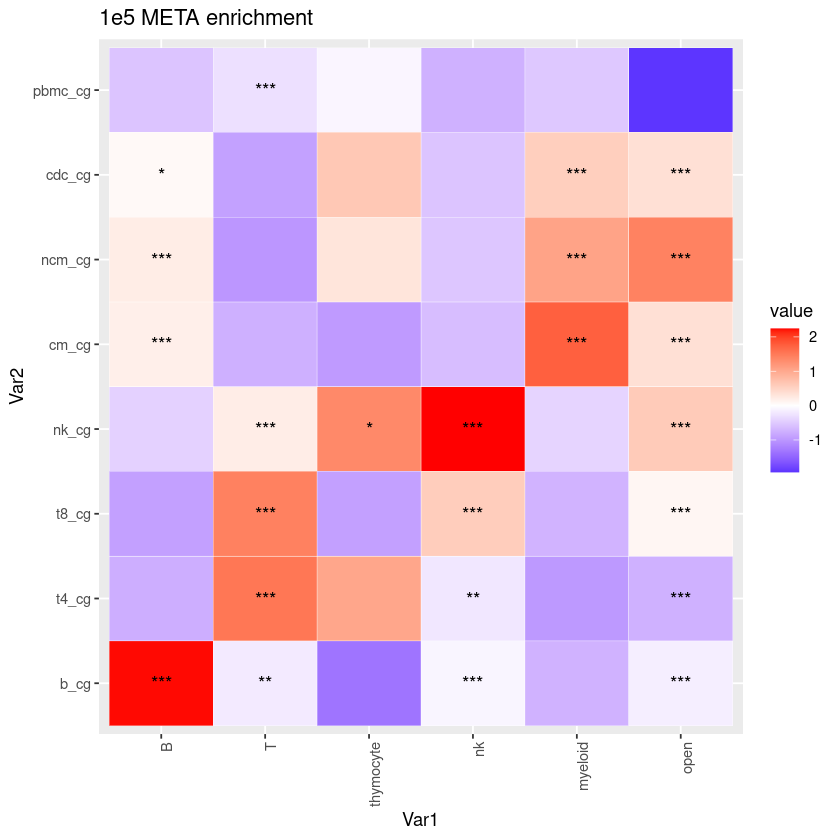

In [16]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 META enrichment")
print(plt)

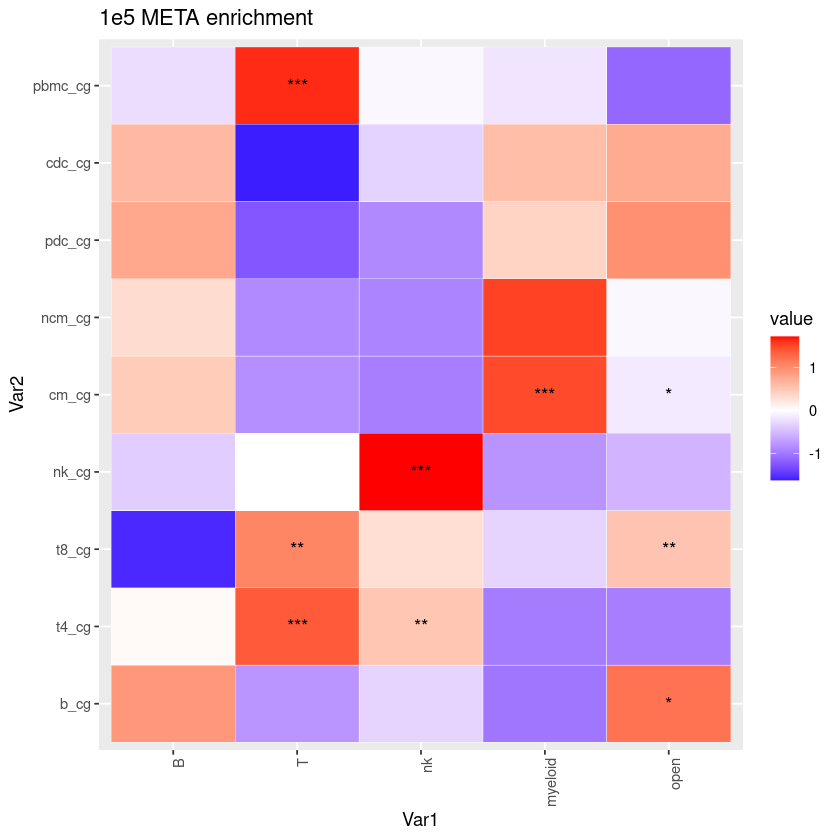

In [11]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 META enrichment")
print(plt)
ggsave(paste0('/wynton/group/ye/ggordon/lupus/analyses/atac_enrichemnt/atacEnrich_vanilla_meta_all_1e5.png'),dpi = 300,width=5, height=4)


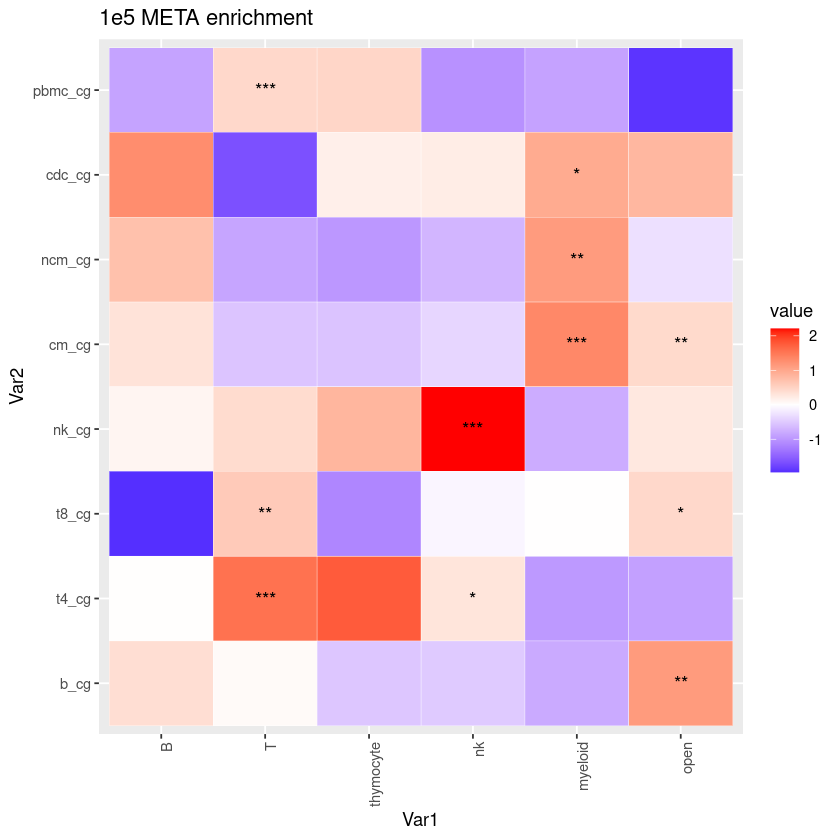

In [9]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 META enrichment")
print(plt)


In [17]:
ggsave(paste0('/wynton/group/ye/ggordon/lupus/analyses/atac_enrichemnt/atacEnrich_meta_simp.png'),dpi = 300,width=4, height=4)

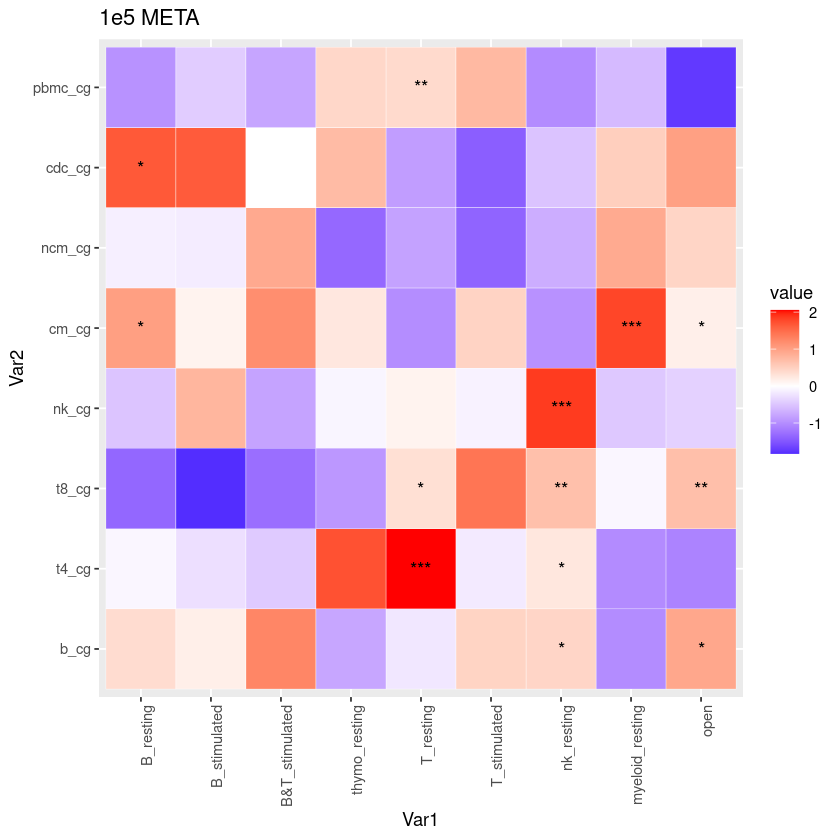

In [20]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 META")
print(plt)
ggsave(paste0('/wynton/group/ye/ggordon/lupus/analyses/atac_enrichemnt/atacEnrich_meta.png'),dpi = 300,width=4, height=4)


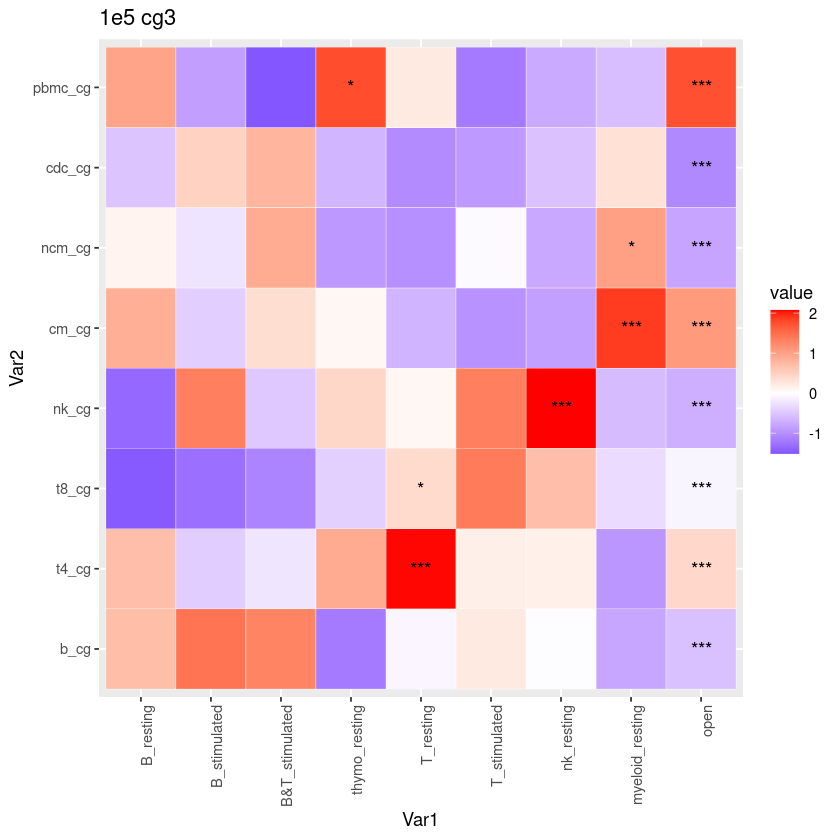

In [31]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 cg3")
print(plt)
ggsave(paste0('/wynton/group/ye/ggordon/lupus/analyses/atac_enrichemnt/atacEnrich_cg3.png'),dpi = 300,width=4, height=4)


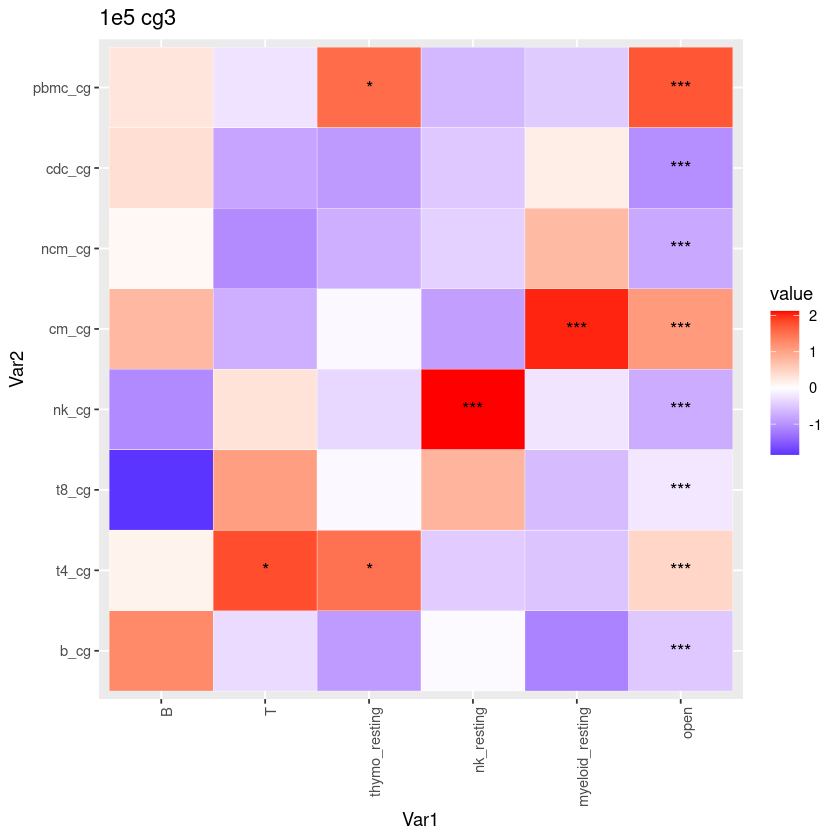

In [29]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 cg3")
print(plt)
ggsave(paste0('/wynton/group/ye/ggordon/lupus/analyses/atac_enrichemnt/atacEnrich_cg3_simple.png'),dpi = 300,width=4, height=4)


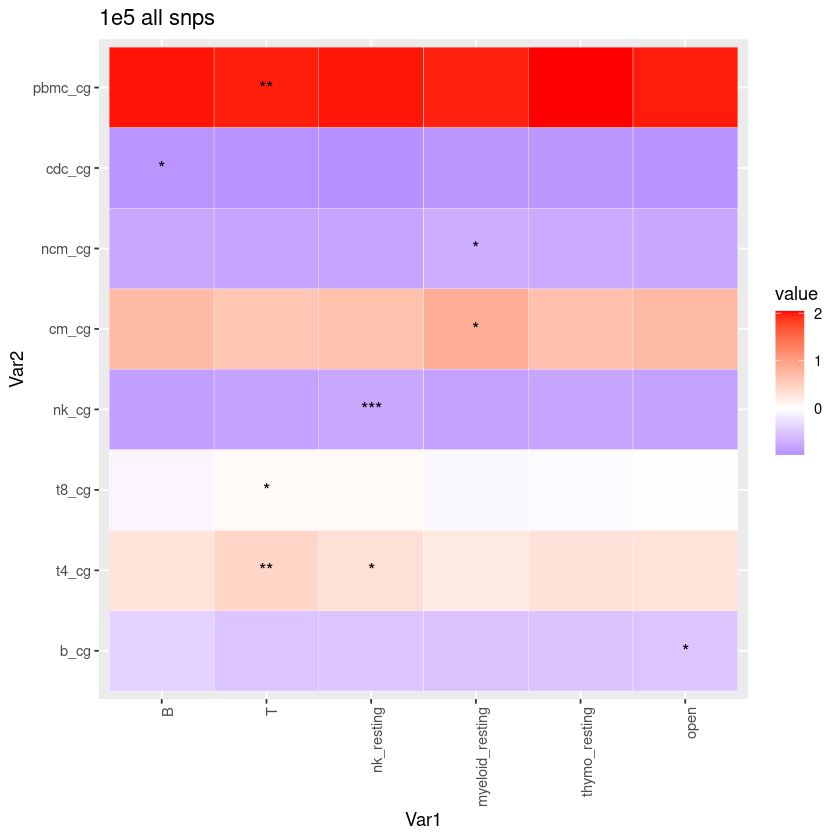

In [11]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 all snps")
print(plt)

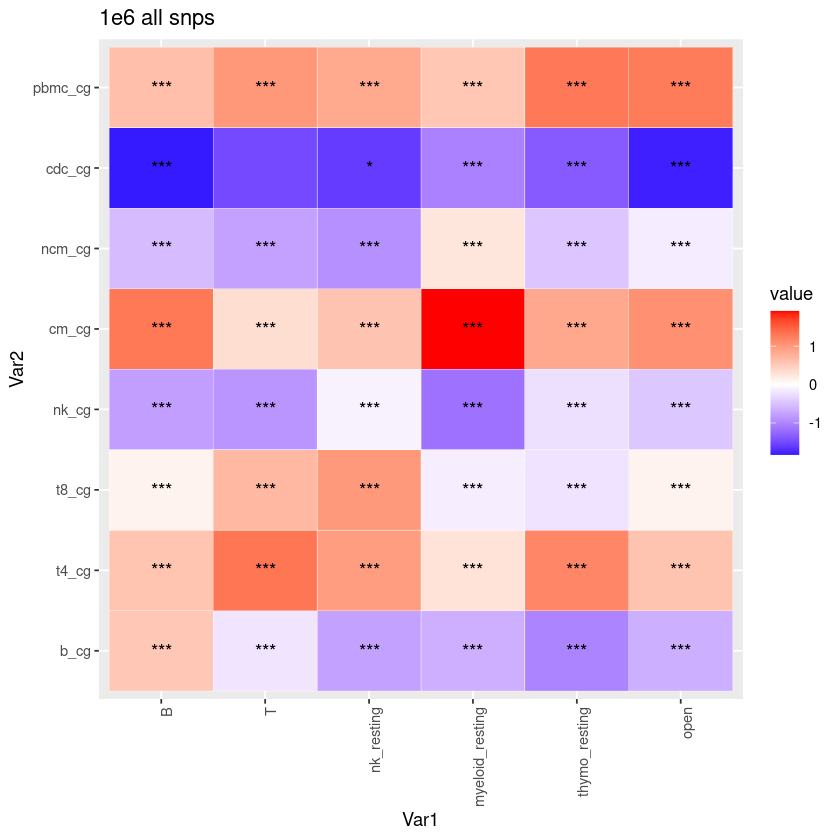

In [4]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e6 all snps")
print(plt)

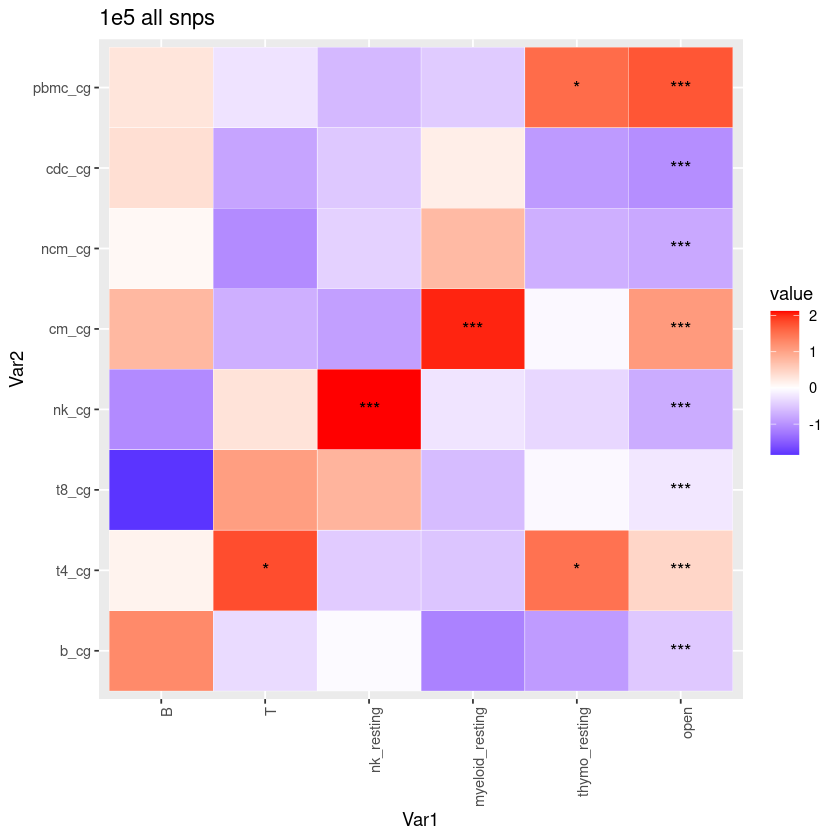

In [18]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ ggtitle("1e5 all snps")
print(plt)